# Smart Ratings for House Listings

##### Motivation
I wanted to be able to recommend areas of improvement for incoming or existing hosts that might help them improve their ratings and eventually attract more customers.

##### Problem Statement
Predict ‘prices’ and ‘ratings’ of the house/room listings using the Airbnb data for New York with the help of various features present in the data (like ‘room type’, ‘neighborhood’, ‘amenities’, etc.).

### Data Preparation

Following are the ways with which I cleaned the data:

In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing Airbnb data (containing over 50 features)
bnb_listings = pd.read_excel('bnbListing.xlsx')
bnb_listings.head(10)

,id,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,2758,Steph,2008-09-06,"New York, New York, United States",NaN,NaN,f,Harlem,3.0,...,10.0,9.0,9.0,9.0,f,strict_14_with_grace_period,f,f,3,1.42
1,2539,2787,John,2008-09-07,"New York, New York, United States",NaN,NaN,t,Gravesend,8.0,...,10.0,10.0,10.0,10.0,f,moderate,f,f,8,0.23
2,2595,2845,Jennifer,2008-09-09,"New York, New York, United States",within a day,0.8,f,Midtown,5.0,...,9.0,10.0,10.0,9.0,f,strict_14_with_grace_period,t,t,2,0.33
3,3330,4177,Jbee,2008-11-09,"New York, New York, United States",NaN,NaN,f,East Williamsburg,5.0,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,f,3,0.32
4,3647,4632,Elisabeth,2008-11-25,"New York, New York, United States",within a day,0.5,f,Harlem,1.0,...,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period,t,t,1,NaN
5,3831,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",within an hour,1.0,f,Clinton Hill,1.0,...,10.0,10.0,9.0,9.0,f,moderate,f,f,1,4.36
6,5022,7192,Laura,2009-01-29,"Miami, Florida, United States",within a day,1.0,f,East Harlem,1.0,...,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,t,t,1,0.09
7,5099,7322,Chris,2009-02-02,"New York, New York, United States",within a day,1.0,f,Flatiron District,1.0,...,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,t,t,1,0.57
8,5121,7356,Garon,2009-02-03,"New York, New York, United States",NaN,NaN,f,Bedford-Stuyvesant,1.0,...,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,f,f,1,0.45
9,5172,7386,Adrienne,2009-02-03,"New York, New York, United States",NaN,NaN,t,Murray Hill,1.0,...,9.0,10.0,10.0,10.0,f,strict_14_with_grace_period,f,t,1,0.71


In [3]:
print('Total number of columns:', len(bnb_listings.columns))

Total number of columns: 55


In [4]:
print('Columns having Nan values:\n', bnb_listings.columns[bnb_listings.isna().any()].tolist())

Columns having Nan values:
 ['host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'city', 'state', 'zipcode', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']


In [5]:
print('Number of columns with NaN values:', len(bnb_listings.columns[bnb_listings.isna().any()].tolist()))

Number of columns with NaN values: 27


In [6]:
bnb_listings['host_since'].describe()

count                   50032
unique                   3335
top       2015-03-30 00:00:00
freq                      148
first     2008-04-21 00:00:00
last      2018-10-02 00:00:00
Name: host_since, dtype: object

In [7]:
# further features that I did not include in our analysis in the wake of relevance
columns_to_drop =['host_location', 'host_name', 'host_neighbourhood', 'street', 'review_scores_accuracy', 
                  'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
                  'review_scores_location', 'review_scores_value', 'host_verifications', 'smart_location']

In [8]:
# dropping the above mentioned features
bnb_listings.drop(columns_to_drop, inplace=True, axis=1)

#### Taking care of Boolean features:

In [9]:
# listing boolean features
boolean_to_binary = ['require_guest_phone_verification', 'require_guest_profile_picture', 
                     'instant_bookable', 'is_location_exact', 'host_identity_verified', 
                     'host_has_profile_pic', 'host_is_superhost']

In [10]:
# replacing 't' and 'f' with 1 and 0
bnb_listings[boolean_to_binary] = (bnb_listings[boolean_to_binary]).replace({'t':1, 'f':0})

#### Taking care of features with null values:

In [11]:
# listing columns with NaN values that need to be filled with zeros
null_to_zero = ['host_is_superhost', 'host_listings_count', 'host_total_listings_count', 
                'host_has_profile_pic', 'host_identity_verified']

In [12]:
# filling NaN values in selected columns to zero
bnb_listings[null_to_zero] = (bnb_listings[null_to_zero]).fillna(0)

In [13]:
# quality check
(bnb_listings[null_to_zero]).isnull().any()

host_is_superhost            False
host_listings_count          False
host_total_listings_count    False
host_has_profile_pic         False
host_identity_verified       False
dtype: bool

In [14]:
# filling null values in city as New York City
bnb_listings['city'] = bnb_listings['city'].fillna('New York City')

In [15]:
# quality check
bnb_listings['city'].isnull().any()

False

In [16]:
# filling null values in state as NY
bnb_listings['state'] = bnb_listings['state'].fillna('NY')

In [17]:
# quality check
bnb_listings['state'].isnull().any()

False

In [18]:
# filling null values with median of the column
bnb_listings['bathrooms'] = bnb_listings['bathrooms'].fillna(round((bnb_listings['bathrooms']).median()))
bnb_listings['bedrooms'] = bnb_listings['bedrooms'].fillna(round((bnb_listings['bedrooms']).median()))
bnb_listings['beds'] = bnb_listings['beds'].fillna(round((bnb_listings['beds']).median()))
bnb_listings['cleaning_fee'] = bnb_listings['cleaning_fee'].fillna(round((bnb_listings['cleaning_fee']).median()))

In [19]:
# quality check
(bnb_listings[['bathrooms', 'bedrooms', 'beds', 'cleaning_fee']]).isnull().any()

bathrooms       False
bedrooms        False
beds            False
cleaning_fee    False
dtype: bool

In [20]:
# some more null values taken care of
bnb_listings['host_response_time'] = bnb_listings['host_response_time'].fillna('Not Available')

In [21]:
bnb_listings['host_response_rate'] = bnb_listings['host_response_rate'].fillna(bnb_listings['host_response_rate'].mean())

In [22]:
# filling null values for some more columns with median of the column
bnb_listings['security_deposit'] = bnb_listings['security_deposit'].fillna(round((bnb_listings['security_deposit']).median()))

In [23]:
bnb_listings['reviews_per_month'] = bnb_listings['reviews_per_month'].fillna(bnb_listings['reviews_per_month'].median())

In [24]:
# quality check
(bnb_listings[['host_response_time', 'security_deposit']]).isnull().any()

host_response_time    False
security_deposit      False
dtype: bool

#### Segmentation & Handling Date-Time column::

In [25]:
# price buckets for segmenting the 'price' column in bnb_listings (quintiles)
(bnb_listings['price']).quantile([0.20, 0.40, 0.60, 0.80])

0.2     60.0
0.4     90.0
0.6    130.0
0.8    199.0
Name: price, dtype: float64

In [26]:
# adding column in our data for storing sgmented prices
bnb_listings['price_segments'] = 0

In [27]:
# segmenting the 'price' column
bnb_listings.loc[bnb_listings.price<=60, 'price_segments'] = 1
bnb_listings.loc[(bnb_listings.price>60)&(bnb_listings.price<=90), 'price_segments'] = 2
bnb_listings.loc[(bnb_listings.price>90)&(bnb_listings.price<=130), 'price_segments'] = 3
bnb_listings.loc[(bnb_listings.price>130)&(bnb_listings.price<=199), 'price_segments'] = 4
bnb_listings.loc[bnb_listings.price>199, 'price_segments'] = 5

In [28]:
# quality check
bnb_listings.loc[(bnb_listings.price>60)&(bnb_listings.price<=90), 'price_segments'].unique()

array([2], dtype=int64)

In [29]:
# taking the values for only the 'year'
bnb_listings['host_since'] = pd.DatetimeIndex(bnb_listings['host_since']).year

In [30]:
# year buckets for segmentation
bnb_listings['host_since'].quantile([0.20, 0.40, 0.60, 0.80])

0.2    2013.0
0.4    2014.0
0.6    2015.0
0.8    2016.0
Name: host_since, dtype: float64

In [31]:
bnb_listings['date_segments'] = 0

In [32]:
# segmenting the 'host_since' column
bnb_listings.loc[bnb_listings.host_since<=2013, 'date_segments'] = 1
bnb_listings.loc[(bnb_listings.host_since>2013)&(bnb_listings.host_since<=2014), 'date_segments'] = 2
bnb_listings.loc[(bnb_listings.host_since>2014)&(bnb_listings.host_since<=2015), 'date_segments'] = 3
bnb_listings.loc[(bnb_listings.host_since>2015)&(bnb_listings.host_since<=2016), 'date_segments'] = 4
bnb_listings.loc[bnb_listings.host_since>2016, 'date_segments'] = 5

In [33]:
# quality check
bnb_listings.loc[(bnb_listings.host_since>2015)&(bnb_listings.host_since<=2016), 'date_segments'].unique()

array([4], dtype=int64)

#### String value conversion:

In [34]:
bnb_listings['amenities']

0        {TV,"Cable TV",Internet,Wifi,"Air conditioning...
1        {TV,"Cable TV",Internet,"Wheelchair accessible...
2        {TV,Wifi,"Air conditioning",Kitchen,"Paid park...
3        {TV,Internet,Wifi,"Wheelchair accessible",Kitc...
4        {"Cable TV",Internet,Wifi,"Air conditioning",K...
5        {TV,"Cable TV",Internet,Wifi,"Air conditioning...
6        {Internet,Wifi,"Air conditioning",Kitchen,Elev...
7        {TV,"Cable TV",Internet,Wifi,Kitchen,"Buzzer/w...
8        {Wifi,"Air conditioning",Kitchen,"Pets live on...
9        {Wifi,"Air conditioning",Kitchen,"Paid parking...
10       {TV,Wifi,"Air conditioning","Paid parking off ...
11       {Internet,Wifi,"Air conditioning","Paid parkin...
12       {TV,"Cable TV",Internet,Wifi,"Air conditioning...
13       {TV,"Cable TV",Wifi,"Air conditioning",Kitchen...
14       {Internet,Wifi,"Air conditioning",Kitchen,Door...
15       {TV,"Air conditioning","Wheelchair accessible"...
16       {Internet,Wifi,"Air conditioning","Free parkin.

In [35]:
# converting the 'amenities' column to project the count of amenities
bnb_listings['amenities'] = bnb_listings['amenities'].map(lambda x:len(x.strip('{}').split(',')))

In [36]:
# quality check
bnb_listings['amenities'].dtype

dtype('int64')

In [37]:
# encoding labels for string valued columns that contain categories
columns = ['host_response_time', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 
           'room_type', 'bed_type', 'cancellation_policy']


def convert(data, columns):
    for i in columns:
        unique_categories = sorted(data[i].unique())
        new_dict = {v:k for k, v in dict(enumerate(unique_categories)).items()}
        data[i] = data[i].map(lambda x:new_dict[x])
    
    return data


bnb_listings = convert(bnb_listings, columns)

In [38]:
# quality check
bnb_listings[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50041 entries, 0 to 50040
Data columns (total 7 columns):
host_response_time              50041 non-null int64
neighbourhood_cleansed          50041 non-null int64
neighbourhood_group_cleansed    50041 non-null int64
property_type                   50041 non-null int64
room_type                       50041 non-null int64
bed_type                        50041 non-null int64
cancellation_policy             50041 non-null int64
dtypes: int64(7)
memory usage: 2.7 MB


In [39]:
# checking the prepared data
bnb_listings

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_segments,date_segments
0,2515,2758,2008.0,0,0.927527,0.0,3.0,3.0,1.0,1.0,...,173,93.0,0,4,0,0,3,1.42,1,1
1,2539,2787,2008.0,0,0.927527,1.0,8.0,8.0,1.0,1.0,...,8,98.0,0,2,0,0,8,0.23,4,1
2,2595,2845,2008.0,2,0.800000,0.0,5.0,5.0,1.0,1.0,...,36,94.0,0,4,1,1,2,0.33,5,1
3,3330,4177,2008.0,0,0.927527,0.0,5.0,5.0,1.0,1.0,...,34,97.0,0,4,0,0,3,0.32,2,1
4,3647,4632,2008.0,2,0.500000,0.0,1.0,1.0,1.0,1.0,...,0,NaN,0,4,1,1,1,0.75,4,1
5,3831,4869,2008.0,4,1.000000,0.0,1.0,1.0,1.0,1.0,...,213,91.0,0,2,0,0,1,4.36,2,1
6,5022,7192,2009.0,2,1.000000,0.0,1.0,1.0,1.0,1.0,...,7,94.0,0,4,1,1,1,0.09,2,1
7,5099,7322,2009.0,2,1.000000,0.0,1.0,1.0,1.0,0.0,...,66,87.0,0,4,1,1,1,0.57,4,1
8,5121,7356,2009.0,0,0.927527,0.0,1.0,1.0,1.0,0.0,...,51,90.0,0,4,0,0,1,0.45,1,1
9,5172,7386,2009.0,0,0.927527,1.0,1.0,1.0,1.0,1.0,...,82,94.0,0,4,0,1,1,0.71,3,1


In [40]:
bnb_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50041 entries, 0 to 50040
Data columns (total 45 columns):
id                                  50041 non-null int64
host_id                             50041 non-null int64
host_since                          50032 non-null float64
host_response_time                  50041 non-null int64
host_response_rate                  50041 non-null float64
host_is_superhost                   50041 non-null float64
host_listings_count                 50041 non-null float64
host_total_listings_count           50041 non-null float64
host_has_profile_pic                50041 non-null float64
host_identity_verified              50041 non-null float64
neighbourhood_cleansed              50041 non-null int64
neighbourhood_group_cleansed        50041 non-null int64
city                                50041 non-null object
state                               50041 non-null object
zipcode                             49305 non-null object
country_code       

<b>Note:</b> The original data that I got from insideairbnb.com was about 183mb in size with about 96 features. In this notebook, I am working on the data that I got after removing the completely irrelevant features (like thumbnail link, image link, etc.) from the raw dataset which I have provided in the folder: './ml5711_vb1275_CodeSubmission/Raw_data/' for reference.

## Price Prediction

Now I am going to import the prepared data and apply different models to it in order to predict 'price_segments'.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# checking data
bnb_listings.head(10)

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_segments,date_segments
0,2515,2758,2008.0,0,0.927527,0.0,3.0,3.0,1.0,1.0,...,173,93.0,0,4,0,0,3,1.42,1,1
1,2539,2787,2008.0,0,0.927527,1.0,8.0,8.0,1.0,1.0,...,8,98.0,0,2,0,0,8,0.23,4,1
2,2595,2845,2008.0,2,0.800000,0.0,5.0,5.0,1.0,1.0,...,36,94.0,0,4,1,1,2,0.33,5,1
3,3330,4177,2008.0,0,0.927527,0.0,5.0,5.0,1.0,1.0,...,34,97.0,0,4,0,0,3,0.32,2,1
4,3647,4632,2008.0,2,0.500000,0.0,1.0,1.0,1.0,1.0,...,0,NaN,0,4,1,1,1,0.75,4,1
5,3831,4869,2008.0,4,1.000000,0.0,1.0,1.0,1.0,1.0,...,213,91.0,0,2,0,0,1,4.36,2,1
6,5022,7192,2009.0,2,1.000000,0.0,1.0,1.0,1.0,1.0,...,7,94.0,0,4,1,1,1,0.09,2,1
7,5099,7322,2009.0,2,1.000000,0.0,1.0,1.0,1.0,0.0,...,66,87.0,0,4,1,1,1,0.57,4,1
8,5121,7356,2009.0,0,0.927527,0.0,1.0,1.0,1.0,0.0,...,51,90.0,0,4,0,0,1,0.45,1,1
9,5172,7386,2009.0,0,0.927527,1.0,1.0,1.0,1.0,1.0,...,82,94.0,0,4,0,1,1,0.71,3,1


In [43]:
print('Number of data points in our data:', len(bnb_listings))

Number of data points in our data: 50041


## Random Forrest

Since I have imported the prepared data which is now ready for analysis, I will first try out <b>Random Forrest</b>, as it is one of the better tree algorithm for working on categorical data.This is being done for 5 price categories

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# splitting the data into training and test split
train_rf, test_rf = train_test_split(bnb_listings, train_size=0.8, test_size=0.2, random_state=42)

Now I will remove some columns that are not required for training/testing of the model.

In [46]:
# items not required in the dataset
items_remove = ['price', 'review_scores_rating', 'id', 'host_id', 'latitude', 'longitude', 
                'price_segments', 'host_since', 'city', 'state', 'country_code', 'zipcode']
target_train = train_rf['price_segments']
target_test = test_rf['price_segments']
train_rf.drop(items_remove, inplace=True, axis=1)
test_rf.drop(items_remove, inplace=True, axis=1)

C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
train_rf.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,...,maximum_nights,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date_segments
9233,0,0.927527,0.0,1.0,1.0,1.0,0.0,81,1,1,...,1125,0,10,0,4,0,0,1,0.23,3
25631,4,1.000000,0.0,8.0,8.0,1.0,1.0,13,1,1,...,1125,307,7,1,4,0,0,8,0.36,3
19030,0,0.927527,0.0,4.0,4.0,1.0,1.0,98,2,1,...,120,87,129,1,4,0,0,1,4.39,4
12044,0,0.927527,0.0,2.0,2.0,1.0,0.0,65,2,1,...,1125,0,7,0,0,0,0,2,0.18,1
18967,4,0.900000,0.0,1.0,1.0,1.0,0.0,218,1,1,...,21,308,99,0,4,0,0,1,3.32,4


In [49]:
target_train.head()

9233     3
25631    3
19030    2
12044    2
18967    5
Name: price_segments, dtype: int64

In [50]:
# creating and fitting random forrest
random_forest_bnb = RandomForestClassifier(n_estimators=1000)
random_forest_bnb.fit(train_rf, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
test_rf.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,...,maximum_nights,availability_365,number_of_reviews,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date_segments
17541,0,0.927527,0.0,1.0,1.0,1.0,0.0,218,1,1,...,1125,0,0,0,0,0,0,1,0.75,4
29296,4,1.000000,0.0,3.0,3.0,1.0,1.0,218,1,1,...,1125,7,76,0,4,0,0,3,4.53,1
3840,0,0.927527,0.0,1.0,1.0,1.0,1.0,98,2,1,...,1125,0,10,0,4,0,0,1,0.24,1
47514,0,0.927527,0.0,1.0,1.0,1.0,0.0,75,1,1,...,10,161,0,1,2,0,0,1,0.75,5
29736,4,0.980000,1.0,5.0,5.0,1.0,1.0,28,1,1,...,21,36,38,0,0,0,0,5,3.53,3


In [52]:
# make predictions
predictions = random_forest_bnb.predict(test_rf)

In [54]:
from sklearn.metrics import accuracy_score

# Evaluation

# for train data
train_predictions = random_forest_bnb.predict(train_rf)

train_accuracy = accuracy_score(target_train, train_predictions)

print("The train accuracy is:",train_accuracy*100,"%")

# for test data
test_predictions = random_forest_bnb.predict(test_rf)

test_accuracy = accuracy_score(target_test, test_predictions)

print("The test accuracy is:",test_accuracy*100,"%")

The train accuracy is: 99.97751798561151 %
The test accuracy is: 55.73983414926567 %


As you can see, the accuracy of the model is low. This can be attributed to the fact that there are 5 segments for price. So, I will now try to reduce it and try running the model again.

#### Now, I will find the accuracy by taking only 3 price segments instead of 5

In [55]:
# creating a copy in order to distinguish
bnb_listings_2 = bnb_listings.copy()

In [56]:
# choosing percentiles to split on
bnb_listings_2['price'].quantile([0.33, 0.67])

0.33     80.0
0.67    150.0
Name: price, dtype: float64

In [57]:
# creating the new price segments
bnb_listings_2['price_segments'] = 0

bnb_listings_2.loc[bnb_listings_2.price<=80, 'price_segments'] = 1
bnb_listings_2.loc[(bnb_listings_2.price>80)&(bnb_listings_2.price<=150), 'price_segments'] = 2
bnb_listings_2.loc[bnb_listings_2.price>150, 'price_segments'] = 3

# quality check
bnb_listings_2['price_segments'].unique()

array([1, 2, 3], dtype=int64)

In [63]:
# for data with 3 price segments
train_rf_2, test_rf_2 = train_test_split(bnb_listings_2, train_size=0.8, test_size=0.2, random_state=42)

target_train_2 = train_rf_2['price_segments']
target_test_2 = test_rf_2['price_segments']
train_rf_2.drop(items_remove, inplace=True, axis=1)
test_rf_2.drop(items_remove, inplace=True, axis=1)

random_forest_bnb_2 = RandomForestClassifier(n_estimators=1000)
random_forest_bnb_2.fit(train_rf_2, target_train_2)

predictions_2 = random_forest_bnb_2.predict(test_rf_2)

# Evaluation
print('For data with 3 price segments:')

# for train data
train_predictions_2 = random_forest_bnb_2.predict(train_rf_2)

train_accuracy_2 = accuracy_score(target_train_2, train_predictions_2)

print("The train accuracy is:",train_accuracy_2*100,"%")

# for test data
test_predictions_2 = random_forest_bnb_2.predict(test_rf_2)

test_accuracy_2 = accuracy_score(target_test_2, test_predictions_2)

print("The test accuracy is:",test_accuracy_2*100,"%")

C:\Users\vivek\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


For data with 3 price segments:
The train accuracy is: 99.98001598721024 %
The test accuracy is: 72.87441302827456 %


Now it can be seen that the accuracy has substantially increased. Now lets look at the feature importance of the features that we have in order to get a better sense of our data.

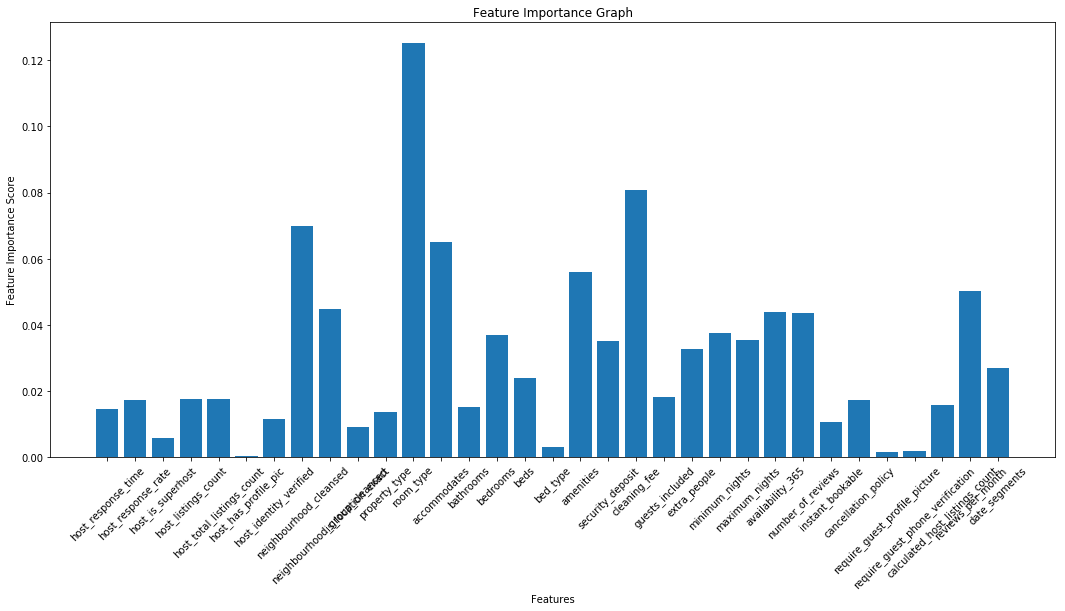

In [59]:
# Feature importances
features = list(train_rf_2)
feature_importances = random_forest_bnb_2.feature_importances_

plt.figure(figsize=(18, 8))
plt.bar(features, feature_importances)
plt.xticks(features, rotation=45)
plt.title('Feature Importance Graph')
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.show()

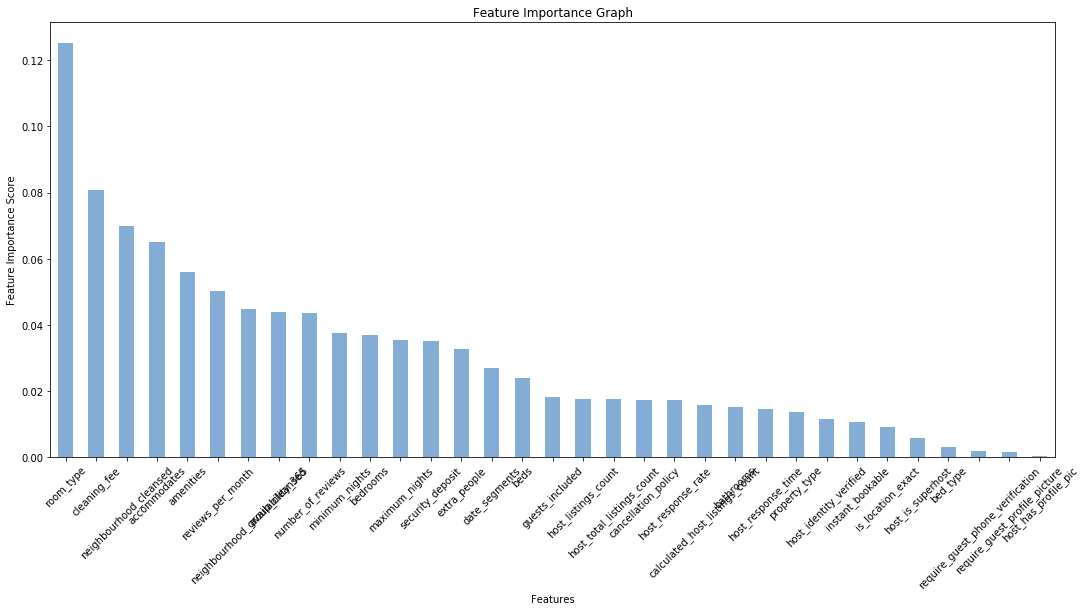

In [60]:
# sorting the feature importances for a better view
sorted_features = pd.Series(feature_importances, features).sort_values(ascending=False)

plt.figure(figsize=(18, 8))
sorted_features.plot(kind='bar', title='Feature Importances - Random Forest', color =(0.4, 0.6, 0.8, 0.8), rot=45)
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance Graph')
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.show()

Now I will  move forward with only those features that are actually important for the analysis.

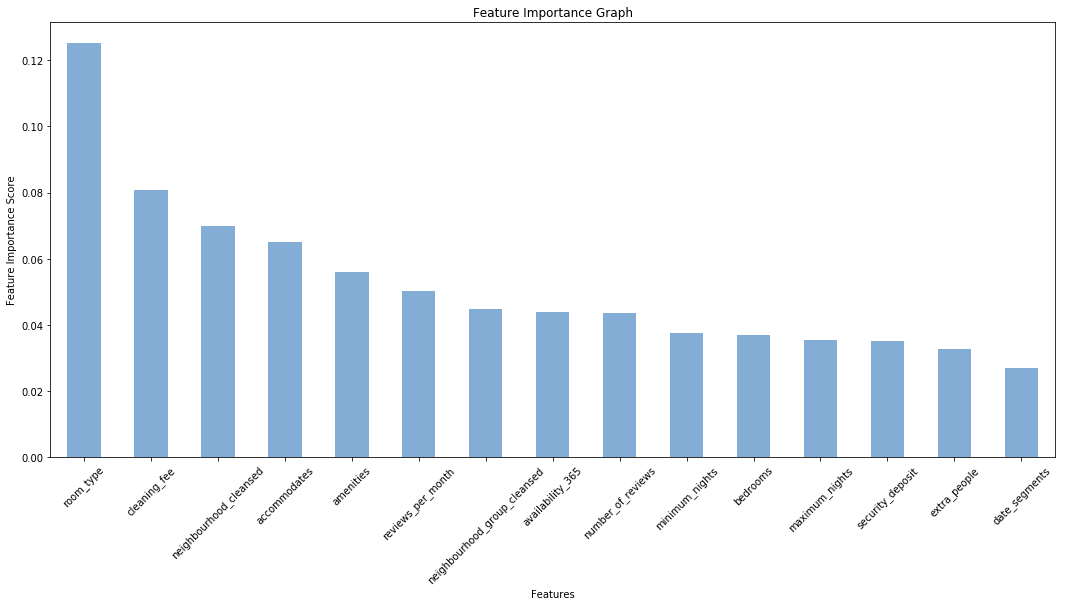

In [61]:
# taking top 15 features
sorted_features = sorted_features.head(15)
plt.figure(figsize=(18, 8))
sorted_features.plot(kind='bar', title='Feature Importances - Random Forest', color =(0.4, 0.6, 0.8, 0.8), rot=45)
plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title('Feature Importance Graph')
plt.show()

<b>Note: </b>It is important to note that, for incoming users, the values for the features 'reviews_per_month' and 'number_of_reviews' will be <b>0</b>. As these features are ranked 6th and 9th respectively, they won't have as much of an impact as the others.

The following cells create a correlation matrix that will help to understand how features interact with each other:

In [62]:
import seaborn as sns

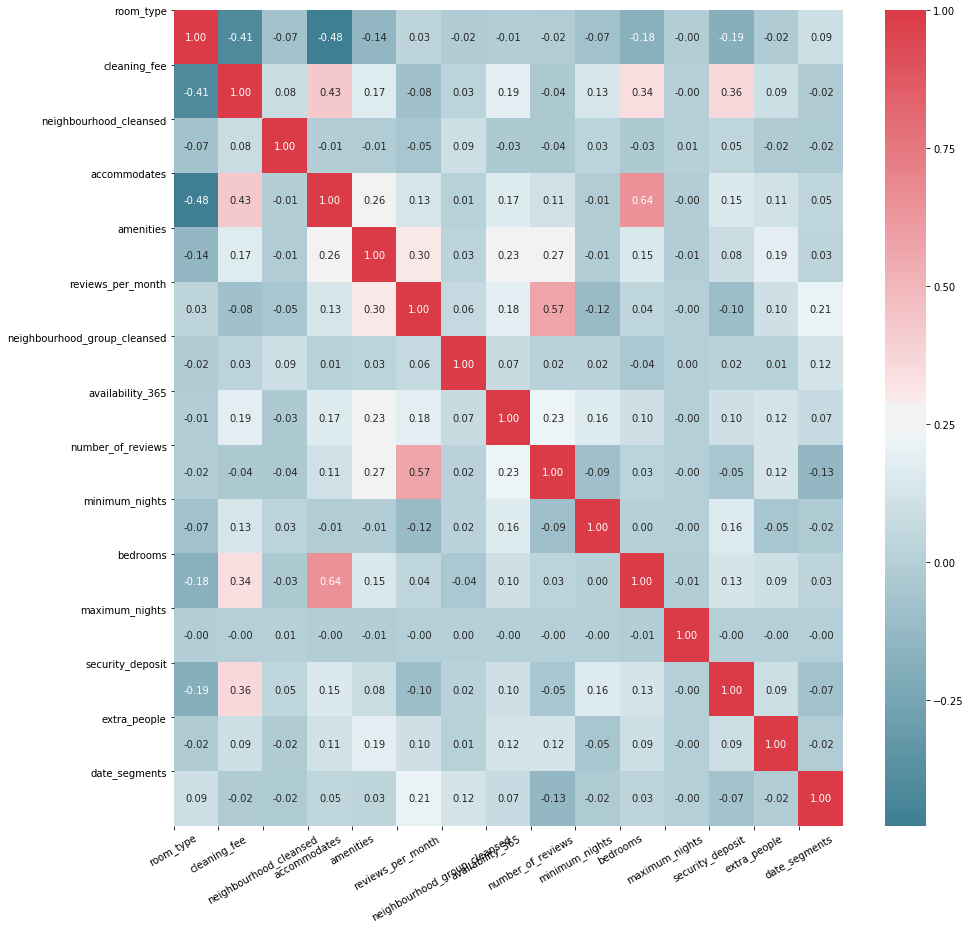

In [64]:
#Create Correlation df
corr = bnb_listings_2[list(sorted_features.index)].corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(15, 15))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=30);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

It can be seen that the correlation among features is not that significant.

Let us apply our model to only these 15 features.

In [66]:
# Taking only relevant features (15 as mentioned above)
train_rf, test_rf = train_test_split(bnb_listings_2, train_size=0.8, test_size=0.2, random_state=42)

target_train_rf = train_rf['price_segments']
target_test_rf = test_rf['price_segments']

train_rf = train_rf[list(sorted_features.index)]
test_rf = test_rf[list(sorted_features.index)]

random_forest_bnb = RandomForestClassifier(n_estimators=1000)
random_forest_bnb.fit(train_rf, target_train_rf)

predictions_rf = random_forest_bnb.predict(test_rf)

# Evaluation

# for train data
train_predictions_rf = random_forest_bnb.predict(train_rf)

train_accuracy_rf = accuracy_score(target_train_rf, train_predictions_rf)

print("The train accuracy is:",train_accuracy_rf*100,"%")

# for test data
test_predictions_rf = random_forest_bnb.predict(test_rf)

test_accuracy_rf = accuracy_score(target_test_rf, test_predictions_rf)

print("The test accuracy is:",test_accuracy_rf*100,"%")

The train accuracy is: 99.92256195043964 %
The test accuracy is: 72.20501548606254 %


# Rating Prediction

### Random Forest for Getting Feature Importance and also for analysis

In [67]:
# removing Null ratings
bnb_listings_ratings = bnb_listings.dropna(subset=['review_scores_rating'])

In [68]:
bnb_listings_ratings.shape

(38445, 45)

Now lets create categories for ratings.

In [69]:
# median ratings
median_ratings = bnb_listings_ratings["review_scores_rating"].median()
median_ratings


#greater than median it is 1 else 0
bnb_listings_ratings = bnb_listings_ratings.copy()
bnb_listings_ratings['review_scores_rating'] = np.where(bnb_listings_ratings['review_scores_rating']>median_ratings, 1, 0)

In [70]:
bnb_listings_ratings['price'].quantile([0.33, 0.67])

0.33     80.0
0.67    149.0
Name: price, dtype: float64

In [71]:
bnb_listings_ratings.loc[bnb_listings_ratings.price<=80, 'price_segments'] = 1
bnb_listings_ratings.loc[(bnb_listings_ratings.price>80)&(bnb_listings_ratings.price<=150), 'price_segments'] = 2
bnb_listings_ratings.loc[bnb_listings_ratings.price>150, 'price_segments'] = 3

In [72]:
bnb_listings_ratings['price_segments'].unique()

array([1, 2, 3], dtype=int64)

In [73]:
bnb_listings_ratings.head(15)

,id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_segments,date_segments
0,2515,2758,2008.0,0,0.927527,0.0,3.0,3.0,1.0,1.0,...,173,0,0,4,0,0,3,1.42,1,1
1,2539,2787,2008.0,0,0.927527,1.0,8.0,8.0,1.0,1.0,...,8,1,0,2,0,0,8,0.23,2,1
2,2595,2845,2008.0,2,0.800000,0.0,5.0,5.0,1.0,1.0,...,36,0,0,4,1,1,2,0.33,3,1
3,3330,4177,2008.0,0,0.927527,0.0,5.0,5.0,1.0,1.0,...,34,1,0,4,0,0,3,0.32,1,1
5,3831,4869,2008.0,4,1.000000,0.0,1.0,1.0,1.0,1.0,...,213,0,0,2,0,0,1,4.36,2,1
6,5022,7192,2009.0,2,1.000000,0.0,1.0,1.0,1.0,1.0,...,7,0,0,4,1,1,1,0.09,1,1
7,5099,7322,2009.0,2,1.000000,0.0,1.0,1.0,1.0,0.0,...,66,0,0,4,1,1,1,0.57,3,1
8,5121,7356,2009.0,0,0.927527,0.0,1.0,1.0,1.0,0.0,...,51,0,0,4,0,0,1,0.45,1,1
9,5172,7386,2009.0,0,0.927527,1.0,1.0,1.0,1.0,1.0,...,82,0,0,4,0,1,1,0.71,2,1
10,5178,8967,2009.0,2,0.910000,0.0,1.0,1.0,1.0,0.0,...,396,0,0,4,0,0,1,3.46,1,1


In [74]:

train, test = train_test_split(bnb_listings_ratings, test_size = 0.20, random_state=42)

In [75]:
# Split into train and test
train_X = train.drop(['price','review_scores_rating','id', 'longitude', 'latitude','city', 'state', 'zipcode'
                      , 'country_code', 'host_since'], axis=1)
train_Y = train['review_scores_rating'] 

test_X = test.drop(['price','review_scores_rating','id', 'longitude', 'latitude','city', 'state', 'zipcode',
                     'country_code', 'host_since'], axis=1)
test_Y = test['review_scores_rating'] 

In [76]:
#Import Library
from sklearn.ensemble import RandomForestClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model= RandomForestClassifier(n_estimators = 1000)
# Train the model using the training sets and check score
model.fit(train_X, train_Y)
#Predict Output
predicted= model.predict(test_X)

In [77]:
#This is to check the accuracy of the model

from sklearn.metrics import accuracy_score

# for Train data
train_predict = model.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

# for train data
test_predict = model.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 99.99349720379763 %
the test accuracy is: 70.19118220834959 %


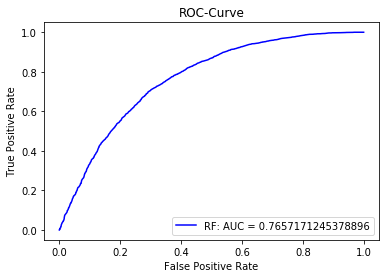

In [78]:
#To plot the ROC-AUC curve of the model

from sklearn.metrics import roc_curve, auc

test_predict = model.predict_proba(test_X)[:,1]

rf_fpr, rf_tpr, threshold = roc_curve(test_Y, test_predict)
rf_auc = auc(rf_fpr, rf_tpr)
plt.title("ROC-Curve")
plt.plot(rf_fpr, rf_tpr, 'b', label='RF: AUC = ' + str(rf_auc))
# plt.plot(svm_fpr, svm_tpr, 'r', label='SVM: AUC = ' + str(svm_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC for this Random Forest is .76 if we don't do any feature selection.

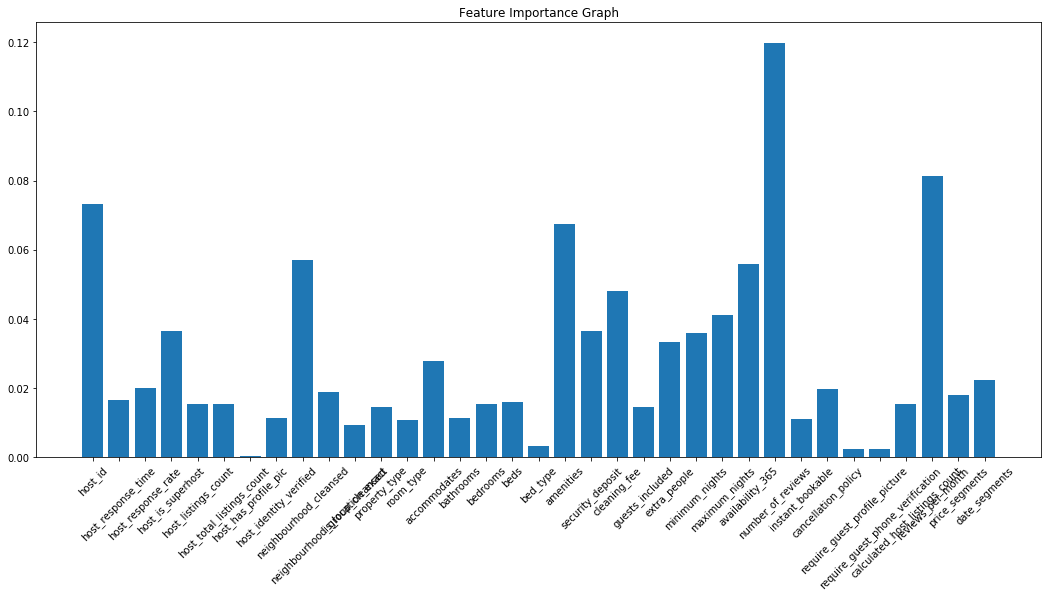

In [79]:
#getting feature importance
feat_imp = model.feature_importances_

#getting a list of columns
feat = list(train_X.columns.values)

plt.figure(figsize=(18, 8))

plt.bar(feat, feat_imp)
# df.letters.value_counts().sort_values().plot(kind = 'barh')

#for good visibility
plt.xticks(feat, rotation=45)
plt.title('Feature Importance Graph')

plt.show()

Text(0, 0.5, 'Feature Importance Score')

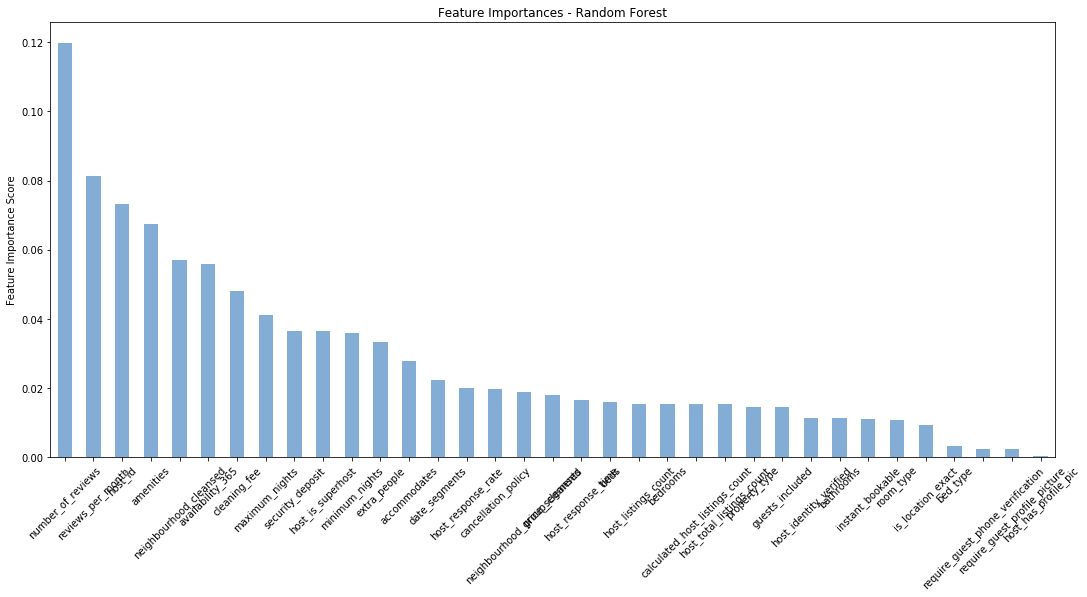

In [80]:
fig, ax = plt.subplots(figsize=(18, 8))
feat_imp = pd.Series(model.feature_importances_, train_X.columns.values).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances - Random Forest', color =(0.4, 0.6, 0.8, 0.8), rot=45)
plt.ylabel('Feature Importance Score')

Text(0, 0.5, 'Feature Importance Score')

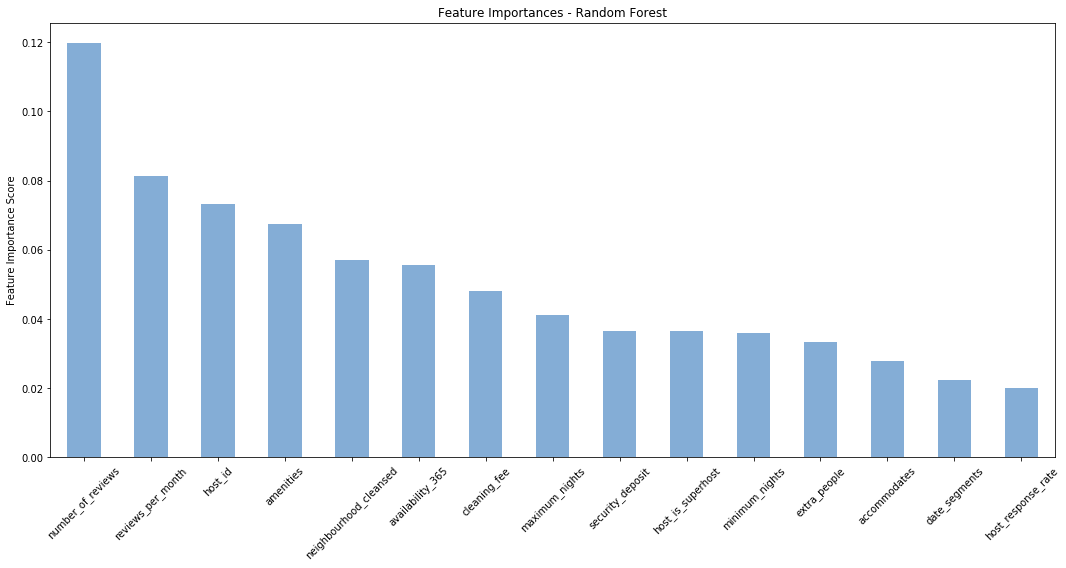

In [81]:
# Feature Importance for top 15 features

fig, ax = plt.subplots(figsize=(18, 8))
feat_imp = pd.Series(model.feature_importances_, train_X.columns.values).sort_values(ascending=False)
feat_imp.head(15).plot(kind='bar', title='Feature Importances - Random Forest', color =(0.4, 0.6, 0.8, 0.8), rot=45)
plt.ylabel('Feature Importance Score')

Getting the top 15 features:

In [82]:
# Viewing top 15 feat imp
feat_imp.head(15)

number_of_reviews         0.119708
reviews_per_month         0.081336
host_id                   0.073276
amenities                 0.067455
neighbourhood_cleansed    0.057145
availability_365          0.055750
cleaning_fee              0.048162
maximum_nights            0.041118
security_deposit          0.036559
host_is_superhost         0.036431
minimum_nights            0.036050
extra_people              0.033474
accommodates              0.027817
date_segments             0.022477
host_response_rate        0.020147
dtype: float64

'number_of_reviews' and 'reviews_per_month' cannot be used in ratings predictions as it is primarily aimed for new listers and they will not have this information.

In [83]:
## Removing 'number_of_reviews' and 'reviews_per_month'
feat_imp_col_list = feat_imp.index.values[2:17]

In [84]:
list(feat_imp_col_list)

['host_id',
 'amenities',
 'neighbourhood_cleansed',
 'availability_365',
 'cleaning_fee',
 'maximum_nights',
 'security_deposit',
 'host_is_superhost',
 'minimum_nights',
 'extra_people',
 'accommodates',
 'date_segments',
 'host_response_rate',
 'cancellation_policy',
 'neighbourhood_group_cleansed']

Correlation matrix for useful features:

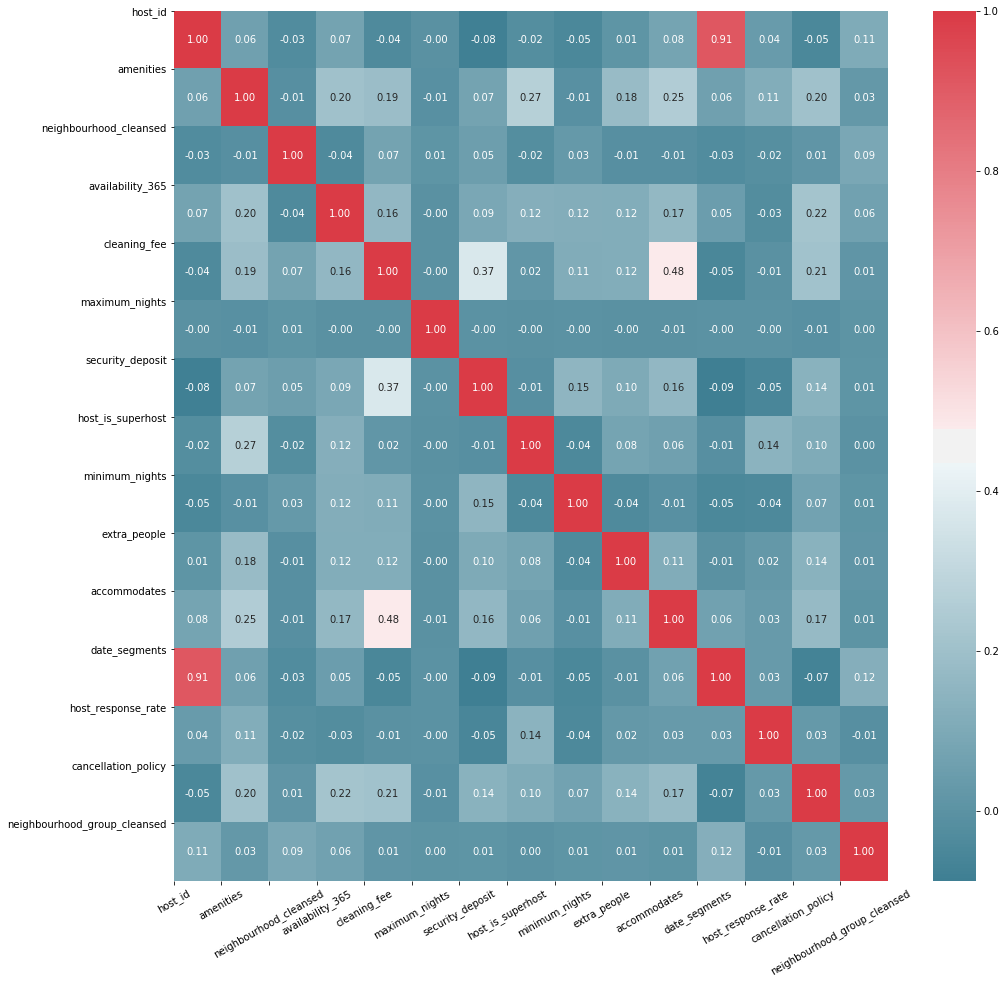

In [85]:
#Correlation matrix for useful features:
import seaborn as sns
#Create Correlation df
corr = bnb_listings_ratings[list(feat_imp_col_list)].corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(16, 16))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=30);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

#### Random Forest with feature selection

In [86]:
## split data into train and test

train_X = train[list(feat_imp_col_list)]
train_Y = train['review_scores_rating'] 

test_X = test[list(feat_imp_col_list)]
test_Y = test['review_scores_rating'] 

In [87]:
#Import Library
from sklearn.ensemble import RandomForestClassifier #use RandomForestRegressor for regression problem
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Random Forest object
model= RandomForestClassifier(n_estimators = 1000)
# Train the model using the training sets and check score
model.fit(train_X, train_Y)
#Predict Output
predicted= model.predict(test_X)

In [88]:
# Checking accuracy of the model
from sklearn.metrics import accuracy_score

# for Train data
train_predict = model.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

test_predict = model.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 99.9414748341787 %
the test accuracy is: 63.0120952009364 %


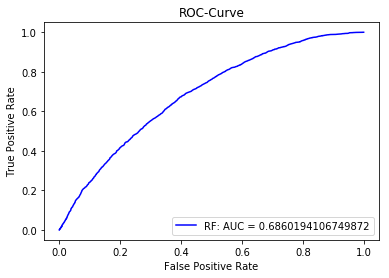

In [89]:
from sklearn.metrics import roc_curve, auc

test_predict = model.predict_proba(test_X)[:,1]

rf_fpr, rf_tpr, threshold = roc_curve(test_Y, test_predict)
rf_auc = auc(rf_fpr, rf_tpr)
plt.title("ROC-Curve")
plt.plot(rf_fpr, rf_tpr, 'b', label='RF: AUC = ' + str(rf_auc))
# plt.plot(svm_fpr, svm_tpr, 'r', label='SVM: AUC = ' + str(svm_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC of Random Forest after keeping only the useful features is reduced to 0.685. The main reason for this is due to the removal of the top 2 features namely 'number_of_reviews' and 'reviews_per_month' from the list of preditor variables.

### Logistic Regression

#### LR Without feature importance

In [90]:
#Taking the ueful features in the train and test split respective

train_X = train.drop(['price','review_scores_rating','id', 'longitude', 'latitude','city', 'state', 'zipcode'
                      , 'country_code', 'host_since'], axis=1)
train_Y = train['review_scores_rating'] 

test_X = test.drop(['price','review_scores_rating','id', 'longitude', 'latitude','city', 'state', 'zipcode',
                     'country_code', 'host_since'], axis=1)
test_Y = test['review_scores_rating'] 

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
%matplotlib inline

# Logisitic regression
log_reg = LogisticRegression(C=1e30)
log_reg.fit(train_X, train_Y)
predictions_LR = log_reg.decision_function(test_X)

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
from sklearn.metrics import accuracy_score

# for Train data
train_predict = log_reg.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

test_predict = log_reg.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 53.52451554168292 %
the test accuracy is: 53.583040707504225 %


In [93]:
predictions_LR = log_reg.predict_proba(test_X)[:,1]
log_reg_fpr, log_reg_tpr, threshold = roc_curve(test_Y, predictions_LR)
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)

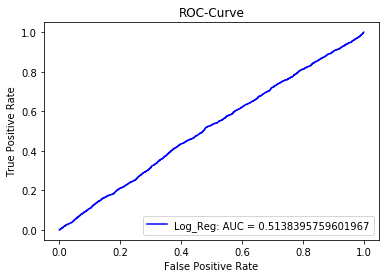

In [94]:
plt.title("ROC-Curve")
plt.plot(log_reg_fpr, log_reg_tpr, 'b', label='Log_Reg: AUC = ' + str(log_reg_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Logistic Regression With Feature importance

In [95]:
# run only if you want 2 categories
train_X = train[list(feat_imp_col_list)]
train_Y = train['review_scores_rating'] 

test_X = test[list(feat_imp_col_list)]
test_Y = test['review_scores_rating'] 

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import roc_curve, auc
%matplotlib inline

# Logisitic regression
log_reg = LogisticRegression(C=1e30)
log_reg.fit(train_X, train_Y)
predictions_LR = log_reg.decision_function(test_X)

C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [97]:
from sklearn.metrics import accuracy_score

# for Train data
train_predict = log_reg.predict(train_X)
train_targ = train_Y

train_accuracy = accuracy_score(train_targ, train_predict)

print("the train accuracy is:",train_accuracy*100,"%")

test_predict = log_reg.predict(test_X)
test_targ = test_Y

test_accuracy = accuracy_score(test_targ, test_predict)

print("the test accuracy is:",test_accuracy*100,"%")

the train accuracy is: 53.52451554168292 %
the test accuracy is: 53.583040707504225 %


In [98]:
## ROC-AUC Curve
predictions_LR = log_reg.predict_proba(test_X)[:,1]
log_reg_fpr, log_reg_tpr, threshold = roc_curve(test_Y, predictions_LR)
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)

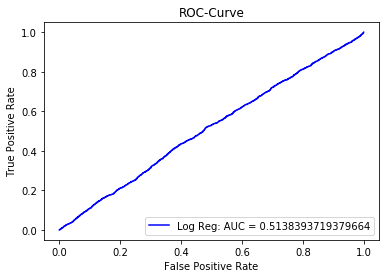

In [99]:
plt.title("ROC-Curve")
plt.plot(log_reg_fpr, log_reg_tpr, 'b', label='Log Reg: AUC = ' + str(log_reg_auc))
# plt.plot(svm_fpr, svm_tpr, 'r', label='SVM: AUC = ' + str(svm_auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Accuracy not that great. Just 0.51 so wont be taking this.

# Thank you!